<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/MNIST_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv("/content/train.csv")

In [150]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


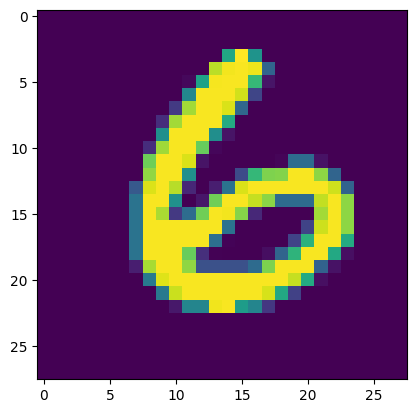

In [151]:
plt.imshow(df.iloc[29828, 1:].values.reshape(28, 28))

In [152]:
# Baseline model - without PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [153]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [154]:
knn_model = KNeighborsClassifier()

In [155]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
y_pred = knn_model.predict(X_test)

In [157]:
accuracy = accuracy_score(y_test, y_pred)

In [158]:
accuracy

0.9648809523809524

In [159]:
# Using PCA
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
pca = PCA(n_components= 200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [161]:
knn_model = KNeighborsClassifier()

In [162]:
knn_model.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [163]:
y_pred = knn_model.predict(X_test_trf)

In [164]:
accuracy = accuracy_score(y_test, y_pred)

In [165]:
accuracy

0.9507142857142857

In [169]:
accuracy_lst = []
for i in range(1, 785):
  pca = PCA(n_components= i)

  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)

  knn_model = KNeighborsClassifier()
  knn_model.fit(X_train_trf, y_train)
  y_pred = knn_model.predict(X_test_trf)

  accuracy_lst.append(accuracy_score(y_test, y_pred))